# 6. 알고리즘 체인과 파이프라인

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import sklearn
import scipy
import os
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(gamma='auto')
svm.fit(X_train_scaled, y_train)

print('테스트 점수: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.951


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print('최상의 교차 검증 정확도: {:.3f}'.format(grid.best_score_))
print('테스트 세트 점수: {:.3f}'.format(grid.score(X_test_scaled, y_test)))
print('최적의 매개변수: {}'.format(grid.best_params_))

최상의 교차 검증 정확도: 0.981
테스트 세트 점수: 0.972
최적의 매개변수: {'C': 1, 'gamma': 1}


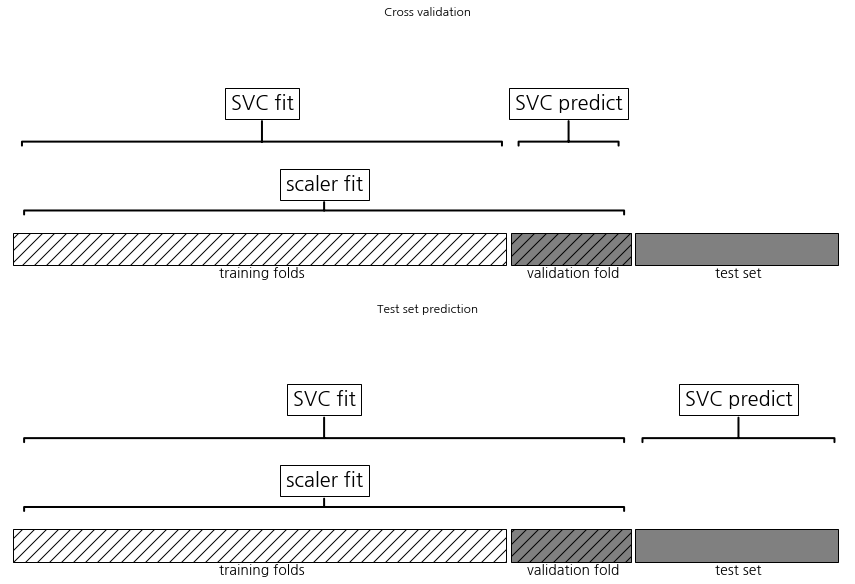

In [5]:
mglearn.plots.plot_improper_processing()

In [6]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(gamma='auto'))])
pipe.fit(X_train, y_train)
print('테스트 세트 점수: {:.3f}'.format(pipe.score(X_test, y_test)))

테스트 세트 점수: 0.951


In [7]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 정확도: {:.3f}'.format(grid.best_score_))
print('테스트 세트 점수: {:.3f}'.format(grid.score(X_test, y_test)))
print('최적의 매개 변수: {}'.format(grid.best_params_))

최상의 교차 검증 정확도: 0.981
테스트 세트 점수: 0.972
최적의 매개 변수: {'svm__C': 1, 'svm__gamma': 1}


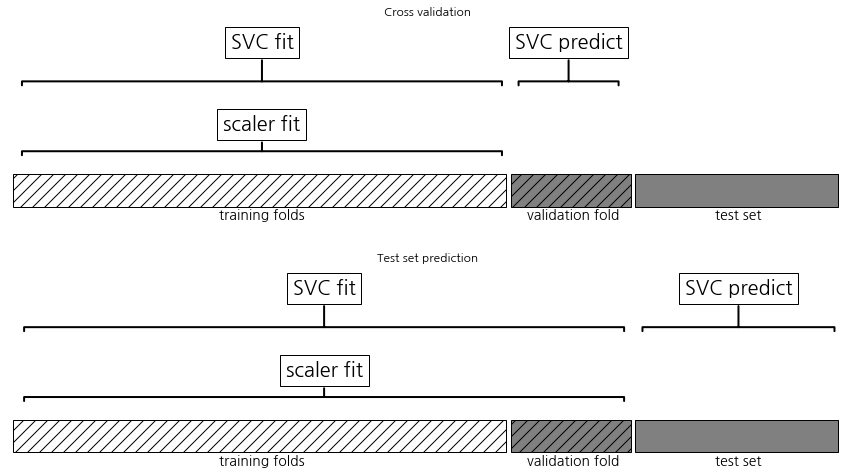

In [8]:
mglearn.plots.plot_proper_processing()

In [9]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [10]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_scaled = select.transform(X)
print('X_selected.shape: {}'.format(X_scaled.shape))

X_selected.shape: (100, 500)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print('교차 검증 정확도(릿지): {:.3f}'.format(np.mean(cross_val_score(Ridge(), X_scaled, y, cv=5))))

교차 검증 정확도(릿지): 0.906


In [12]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)), ('ridge', Ridge())])
print('교차 검증 정확도(파이프라인): {:.3f}'.format(np.mean(cross_val_score(pipe, X, y, cv=5))))

교차 검증 정확도(파이프라인): -0.247


In [13]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [14]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.steps[-1][1].predict(X_transformed)

In [15]:
fit(pipe, X, y)

Pipeline(memory=None,
     steps=[('select', SelectPercentile(percentile=5,
         score_func=<function f_regression at 0x10b408d08>)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [16]:
predict(pipe, X)

array([ 0.51368782,  1.11301771,  0.6752795 , -0.55959584, -0.83492676,
        2.17072144,  1.50248066,  1.48769506,  0.65394205,  0.01975607,
       -0.39927752,  0.95698545, -0.22858436,  0.84352548,  0.09357948,
       -0.00654011,  0.55576346, -0.00376703,  0.32248359,  0.75698638,
        0.33014311,  0.72472104, -0.52023195, -0.46588987, -1.30623188,
       -0.01864303, -0.59919402, -1.31854086, -0.57816456, -1.28044392,
        1.75172398,  0.42501448, -2.09003447, -0.47518179, -0.48729471,
       -1.33904382,  0.84073077,  0.15113336,  0.14627459, -0.1164492 ,
       -2.31156473, -0.66715428,  0.7774888 , -0.12200408, -1.29997668,
        0.63518959, -0.53158959,  0.25798881, -1.18928189,  0.33281623,
       -1.81774603, -0.47158718, -0.34840179,  0.05363209,  0.59511373,
        0.76763371,  0.14662214,  0.78840267,  1.67947132,  1.08011066,
        1.14737807, -0.60474688,  0.60375807, -2.32135268,  0.4265273 ,
       -1.85864982,  0.16610921, -1.28748905, -0.93180407, -1.59

In [17]:
from sklearn.pipeline import make_pipeline
pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [18]:
print('파이프라인 단계:\n{}'.format(pipe_short.steps))

파이프라인 단계:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print('파이프라인 단계:\n{}'.format(pipe.steps))

파이프라인 단계:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [20]:
pipe.fit(cancer.data)
components = pipe.named_steps['pca'].components_
print('components.shape: {}'.format(components.shape))

components.shape: (2, 30)


In [21]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', max_iter=10000))
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print('최상의 모델:\n{}'.format(grid.best_estimator_))

최상의 모델:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


In [23]:
print('로지스틱 회귀 단계:\n{}'.format(grid.best_estimator_.named_steps['logisticregression']))

로지스틱 회귀 단계:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [24]:
print('로지스틱 회귀 계수:\n{}'.format(grid.best_estimator_.named_steps['logisticregression'].coef_))

로지스틱 회귀 계수:
[[-0.34544958 -0.38444935 -0.33988553 -0.3505656  -0.16913186 -0.03157163
  -0.32665637 -0.42678968 -0.2045492   0.16941073 -0.53273967 -0.00933038
  -0.43498257 -0.40182175  0.07447853  0.24949134  0.0994215  -0.07708802
   0.09495805  0.26302164 -0.49111303 -0.48321499 -0.46467249 -0.45726692
  -0.32629663 -0.16551265 -0.37312226 -0.48736181 -0.36902284 -0.18518844]]


In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [26]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
             'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [27]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, iid=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

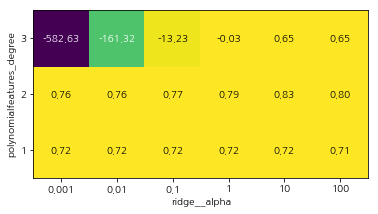

In [28]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                     xlabel='ridge__alpha', ylabel='polynomialfeatures_degree',
                     xticklabels=param_grid['ridge__alpha'],
                     yticklabels=param_grid['polynomialfeatures__degree'])

In [29]:
print('최적의 매개변수: {}'.format(grid.best_params_))

최적의 매개변수: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [30]:
print('테스트 점수: {:.3f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.768


In [31]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, iid=True)
grid.fit(X_train, y_train)
print('다항 특성이 없을 때 점수: {:.3f}'.format(grid.score(X_test, y_test)))

다항 특성이 없을 때 점수: 0.627


In [32]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [33]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
         'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
         'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)], 'preprocessing': [None],
         'classifier__max_features': [1, 2, 3]}]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print('최적의 매개 변수:\n{}'.format(grid.best_params_))
print('교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('테스트 점수: {:.2f}'.format(grid.score(X_test, y_test)))

최적의 매개 변수:
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
교차 검증 점수: 0.99
테스트 점수: 0.98
